In [1]:
def show_matrix(matrix, name='ans', decimal_places=2, scientific_notation=True):
  """
  Displays a matrix with the specified number of decimal places.

  Parameters:
  ---
  - matrix: numpy.ndarray, the matrix to be displayed.
  - name: str, the name to be used in the display header (default is 'ans').
  - decimal_places: int, the number of decimal places to display (default is 2).
  - scientific_notation: bool, if True, uses scientific notation; otherwise, uses fixed-point notation (default is True).
  """
  # Define the format pattern based on whether scientific notation is used
  pattern = f"{{:.{decimal_places}{'e' if scientific_notation else 'f'}}}"

  def format_elem(elem):
    """
    Formats a single matrix element according to the defined pattern.

    Parameters:
    - elem: the element to be formatted.

    Returns:
    - str: the formatted element.
    """
    return pattern.format(elem)

  # Calculate the maximum width required for each column
  col_widths = [max(map(len, map(format_elem, col))) for col in matrix.T]

  print(f"{name} =")  # Print the matrix name
  # Calculate the spacing for the matrix border
  nspaces = sum(col_widths) + 2 * matrix.shape[1]

  # Print the top border of the matrix
  print("    ┌" + " " * nspaces + "┐")

  # Print each row of the matrix
  for row in matrix:
    # Format each element of the row and right-align according to column width
    formatted_row = "  ".join(format_elem(e).rjust(w)
                              for e, w in zip(row, col_widths))
    print(f"    │ {formatted_row} │")

  # Print the bottom border of the matrix
  print("    └" + " " * nspaces + "┘\n")

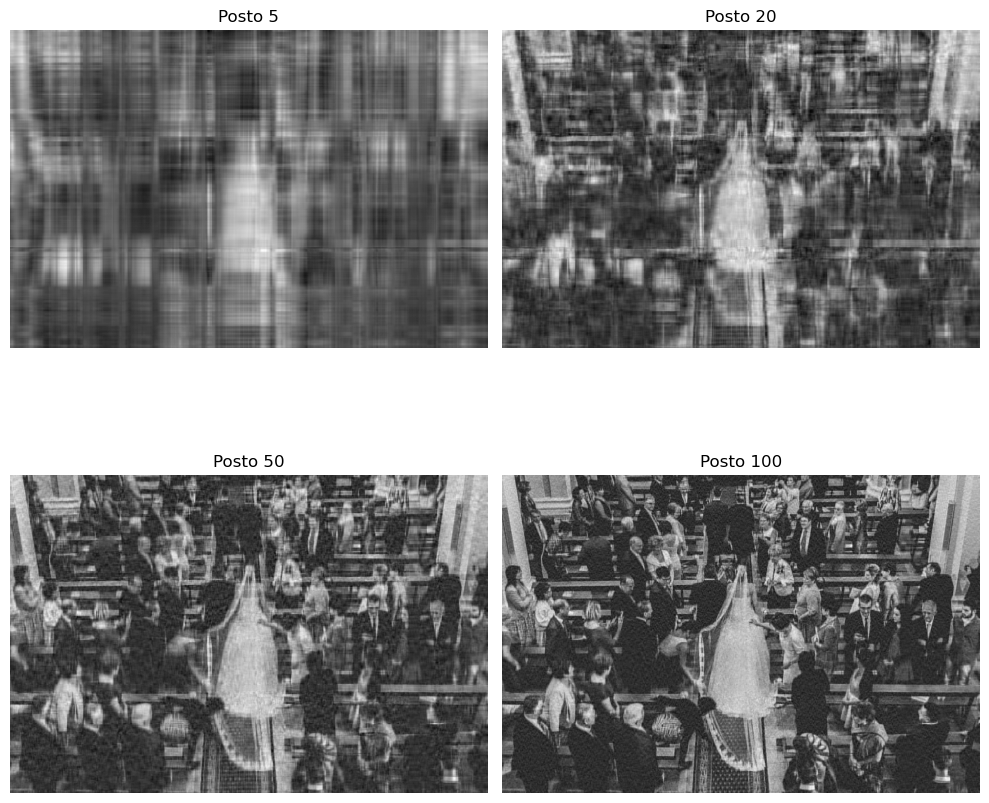

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# %matplotlib qt
# %matplotlib inline


def compress_image(image, k):
  """
  Aplica a decomposição SVD e retorna a imagem reconstruída com rank k.
  :param image: Matriz representando a imagem (grayscale ou canal de cor).
  :param k: Número de componentes a serem mantidos.
  :return: Imagem reconstruída com rank k.
  """
  U, S, Vt = np.linalg.svd(image, full_matrices=False)
  S_k = np.diag(S[:k])  # Reduz os valores singulares para os k primeiros
  return U[:, :k] @ S_k @ Vt[:k, :]


# Carregar imagem em escala de cinza
image = imread("image.jpeg")  # Substitua pelo caminho da imagem
if image.ndim == 3:  # Converter para escala de cinza se necessário
  image = np.mean(image, axis=2)

# Parâmetros de compressão
# Parâmetros de compressão
ranks = [5, 20, 50, 100]  # Níveis de compressão (postos)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Duas linhas e duas colunas

# Aplicar compressão e exibir resultados
for i, k in enumerate(ranks):
  row, col = divmod(i, 2)
  compressed_image = compress_image(image, k)
  axs[row, col].imshow(compressed_image, cmap='gray')
  axs[row, col].set_title(f"Posto {k}")
  axs[row, col].axis('off')

plt.tight_layout()
plt.show()